# Final Project- Finetuning of Blenderbot 90M on Daily dialog, ConvAi2 and Wizard of Wikipedia datasets


---


## Name: Hrishikesh Kanade
## CWID: 20008801


---
Key references
1. Roller, Stephen, et al. "Recipes for building an open-domain chatbot." arXiv preprint arXiv:2004.13637 (2020).
2. Rashkin, Hannah, et al. "Towards empathetic open-domain conversation models: A new benchmark and dataset." arXiv preprint arXiv:1811.00207 (2018).
9
3. Zhang, Saizheng, et al. "Personalizing dialogue agents: I have a dog, do you have pets too?." arXiv preprint arXiv:1801.07243 (2018).
4. Dinan, Emily, et al. "Wizard of wikipedia: Knowledge-powered conversational agents." arXiv preprint arXiv:1811.01241 (2018).
5. Smith, Eric Michael, et al. "Can you put it all together: Evaluating conversational agents' ability to blend skills." arXiv preprint arXiv:2004.08449 (2020).
6. GPT4


## Setup ParlAI and install pre-requisites

In [2]:
!nvidia-smi

Wed Dec 13 02:36:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    23W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!export CUDA_VISIBLE_DEVICES=0

### Clone into ParlAI repo

In [3]:
!git clone https://github.com/facebookresearch/ParlAI.git
%cd ParlAI/

Cloning into 'ParlAI'...
remote: Enumerating objects: 48019, done.
remote: Counting objects: 100% (534/534), done.
remote: Compressing objects: 100% (342/342), done.
remote: Total 48019 (delta 247), reused 390 (delta 167), pack-reused 47485
Receiving objects: 100% (48019/48019), 145.80 MiB | 16.25 MiB/s, done.
Resolving deltas: 100% (34051/34051), done.
/content/ParlAI


In [4]:
!python setup.py develop

running develop
/usr/local/lib/python3.10/dist-packages/setuptools/command/develop.py:40: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://github.com/pypa/setuptools/issues/917 for details.
        ********************************************************************************

!!
  easy_install.initialize_options(self)
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.



In [5]:
!pip install portalocker iopath

### Install NVIDIA Apex

In [6]:
!git clone https://github.com/NVIDIA/apex

Cloning into 'apex'...
remote: Enumerating objects: 11521, done.
remote: Counting objects: 100% (3589/3589), done.
remote: Compressing objects: 100% (506/506), done.
remote: Total 11521 (delta 3265), reused 3181 (delta 3080), pack-reused 7932
Receiving objects: 100% (11521/11521), 15.43 MiB | 19.82 MiB/s, done.
Resolving deltas: 100% (8094/8094), done.


In [7]:
!pwd


/content/ParlAI


In [8]:
cd /content/ParlAI/apex

/content/ParlAI/apex


In [9]:
!pip install cuda-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.6/23.6 MB 47.2 MB/s eta 0:00:00


In [10]:
!python setup.py develop



torch.__version__  = 2.1.0+cu118


running develop
/usr/local/lib/python3.10/dist-packages/setuptools/command/develop.py:40: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://github.com/pypa/setuptools/issues/917 for details.
        ********************************************************************************

!!
  easy_install.initialize_options(self)
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
 

In [ ]:
cd

/root


In [ ]:
pwd

'/root'

In [11]:
!cd /content/ParlAI/apex/apex
#!cd /content/ParlAI/apex/apex
!pip install apex --disable-pip-version-check --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext"

DEPRECATION: --build-option and --global-option are deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use --config-settings. Discussion can be found at https://github.com/pypa/pip/issues/11859


In [ ]:
!pip3 uninstall torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1

Found existing installation: torch 2.0.0+cu118
Uninstalling torch-2.0.0+cu118:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/bin/torchrun
    /usr/local/lib/python3.9/dist-packages/functorch/*
    /usr/local/lib/python3.9/dist-packages/nvfuser/*
    /usr/local/lib/python3.9/dist-packages/torch-2.0.0+cu118.dist-info/*
    /usr/local/lib/python3.9/dist-packages/torch/*
    /usr/local/lib/python3.9/dist-packages/torchgen/*
Proceed (Y/n)? y
y


In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.8.1+cu111 (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2, 2.1.0, 2.1.0+cpu, 2.1.0+cpu.cxx11.abi, 2.1.0+cu118, 2.1.0+cu121, 2.

In [ ]:
!pip uninstall apex

Found existing installation: apex 0.9.10.dev0
Uninstalling apex-0.9.10.dev0:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/apex-0.9.10.dev0.dist-info/*
    /usr/local/lib/python3.8/dist-packages/apex/*
Proceed (Y/n)? Y
  Successfully uninstalled apex-0.9.10.dev0


In [12]:
pip install transformers

In [13]:
pip install parlai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.6/547.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 611.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.9/95.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.3/120.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB

In [ ]:
import nltk; nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
!cd /content/drive/MyDrive/parlbb

/content/ParlAI/data/models/blender/blender_90M/model

# Train model

In [7]:
!python /content/ParlAI/parlai/scripts/train_model.py -t dailydialog -mf /content/ParlAI/data/models/blender/blender_90M/model --short-final-eval True --batchsize 50 -vme 100 -learningrate 1.0e-4 --num-epochs 2 --model transformer/generator

02:56:49 | building dictionary first...
02:56:49 | Overriding opt["task"] to dailydialog (previously: convai2)
02:56:49 | Overriding opt["num_epochs"] to 2.0 (previously: 0.1)
02:56:49 | Using CUDA
02:56:49 | loading dictionary from /content/ParlAI/data/models/blender/blender_90M/model.dict
02:56:49 | num words = 54944
02:56:49 | DEPRECATED: XLM should only be used for backwards compatibility, as it involves a less-stable layernorm operation.
02:56:52 | Total parameters: 87,508,992 (87,508,992 trainable)
02:56:52 | Loading existing model params from /content/ParlAI/data/models/blender/blender_90M/model
02:56:53 | Opt:
02:56:53 |     activation: gelu
02:56:53 |     adafactor_eps: '[1e-30, 0.001]'
02:56:53 |     adam_eps: 1e-08
02:56:53 |     add_missing_turns: none
02:56:53 |     add_p1_after_newln: False
02:56:53 |     aggregate_micro: False
02:56:53 |     allow_missing_init_opts: False
02:56:53 |     attention_dropout: 0.0
02:56:53 |     batchsize: 50
02:56:53 |     beam_block_full_co

# Evaluate model

In [11]:
!parlai eval_model --task convai2 --model transformer/generator --model-file /content/ParlAI/data/models/blender/blender_90M/model --metrics bleu --num-examples 500 --batchsize 25 --datatype test --report-filename /content/results/Final_convai2_eval_report.txt

2023-12-13 03:07:03.198877: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 03:07:03.198936: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 03:07:03.198964: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 03:07:04.380116: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
03:07:06 | Overriding opt["task"] to convai2 (previously: dailydialog)
03:07:06 | Overriding opt["metrics"] to bleu (previously: default)
03:07:06 | Overriding opt["batchsize"] to 25 (previously: 50)
03:07:06 | Overriding opt["datatype"] 

In [12]:
!zip -r "/content/results_nlp_final.zip" "/content/results"

  adding: content/results/ (stored 0%)
  adding: content/results/Final_WoW_eval_report.txt (deflated 68%)
  adding: content/results/Final_DD_eval_report.txt (deflated 68%)
  adding: content/results/Final_convai2_eval_report.txt (deflated 68%)
  adding: content/results/Final_BST_eval_report.txt (deflated 68%)


# Interact with the model

In [ ]:
!python /content/ParlAI/parlai/scripts/interactive.py -t dailydialog -model transformer/generator -mf /content/drive/MyDrive/blender/content/ParlAI/data/models/blender/blender_90M/model

15:56:42 | Overriding opt["model_file"] to /content/drive/MyDrive/blender/content/ParlAI/data/models/blender/blender_90M/model (previously: /content/ParlAI/data/models/blender/blender_90M/model)
15:56:42 | Using CUDA
15:56:42 | loading dictionary from /content/drive/MyDrive/blender/content/ParlAI/data/models/blender/blender_90M/model.dict
15:56:51 | num words = 54944
15:56:52 | TransformerGenerator: full interactive mode on.
15:56:52 | DEPRECATED: XLM should only be used for backwards compatibility, as it involves a less-stable layernorm operation.
15:56:57 | Total parameters: 87,508,992 (87,508,992 trainable)
15:56:57 | Loading existing model params from /content/drive/MyDrive/blender/content/ParlAI/data/models/blender/blender_90M/model
15:57:39 | Opt:
15:57:39 |     activation: gelu
15:57:39 |     adafactor_eps: '[1e-30, 0.001]'
15:57:39 |     adam_eps: 1e-08
15:57:39 |     add_p1_after_newln: False
15:57:39 |     aggregate_micro: False
15:57:39 |     allow_missing_init_opts: False
1

In [ ]:
!mv  "/content/ParlAI/results_nlp_WoW.zip" "/content/ParlAI/results_wow"

mv: cannot stat '/content/ParlAI/results_nlp_WoW.zip': No such file or directory


In [ ]:
!unzip "/content/ParlAI/Bsmall90_4epoch (2).zip" -d "/content/drive/MyDrive/BB4ep"

Archive:  /content/ParlAI/Bsmall90_4epoch (2).zip
   creating: /content/drive/MyDrive/BB4ep/content/tune_blenderbot/tune_blenderbot/Checkpoint/checkpoint-2000/
  inflating: /content/drive/MyDrive/BB4ep/content/tune_blenderbot/tune_blenderbot/Checkpoint/checkpoint-2000/pytorch_model.bin  
  inflating: /content/drive/MyDrive/BB4ep/content/tune_blenderbot/tune_blenderbot/Checkpoint/checkpoint-2000/optimizer.pt  
  inflating: /content/drive/MyDrive/BB4ep/content/tune_blenderbot/tune_blenderbot/Checkpoint/checkpoint-2000/merges.txt  
  inflating: /content/drive/MyDrive/BB4ep/content/tune_blenderbot/tune_blenderbot/Checkpoint/checkpoint-2000/rng_state.pth  
  inflating: /content/drive/MyDrive/BB4ep/content/tune_blenderbot/tune_blenderbot/Checkpoint/checkpoint-2000/training_args.bin  
  inflating: /content/drive/MyDrive/BB4ep/content/tune_blenderbot/tune_blenderbot/Checkpoint/checkpoint-2000/tokenizer_config.json  
  inflating: /content/drive/MyDrive/BB4ep/content/tune_blenderbot/tune_blender

In [ ]:
!nvidia-smi -L

GPU 0: NVIDIA A100-SXM4-40GB (UUID: GPU-164c354b-68e6-9730-afc8-3de828649d13)


# Scripts for generating plots

<ipython-input-56-16fff967b1f3>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


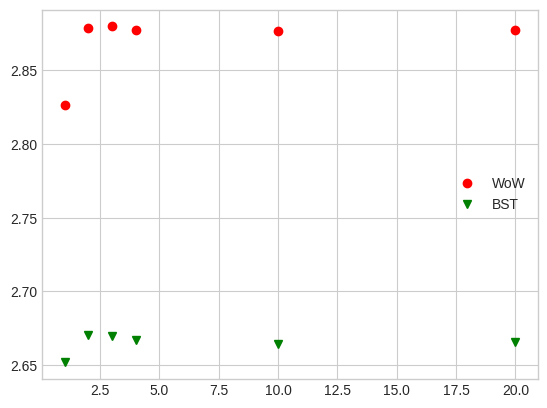

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
BST_loss=[2.651872360277538,2.6701974318034556,2.6695504038430915,2.6667166632283763,2.664651710788082,2.665770380960113]
#DD_loss=[2.9318,	2.9673,	2.9143,	2.8746,	2.8594,	2.8514,	2.4618]
wow_loss=[2.8262474074695283,	2.878945535541381,2.8798144036891475,2.8772246908021453,2.8766204575164207,2.87725445972193]
#BST_loss=[2.6355,	2.7283,	2.6643,	2.6900,	2.7208,	2.7490,	2.9414]


DD_f1=[0.1238,	0.1382,	0.1396,	0.1361,	0.1414,	0.1552]
BST_f1=[0.1658,	0.1656,	0.1684,	0.1661,	0.1654,	0.1594]
x_axis = [1,2,3,4,10,20]

plt.plot(x_axis,wow_loss, 'ro', label = "WoW")
plt.plot(x_axis,BST_loss,'gv',label = "BST")

plt.legend()
plt.show()